# Лабораторная работа 1

Вариант - 9

Датасет - магазины

Поля 
1. ID магазина
2. площадь магазина 
3. количество разных товаров 
4. количество покупателей
5. объем продаж

Загрузка и сохранение данных

In [1]:
import pandas as pd

df = pd.read_csv("data/Stores.csv")
df.to_csv("data/Stores_updated.csv", index=False)

Получение сведений о датафрейме с данными

1. Общая информация о датафрейме

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


2. Статистическая информация

In [3]:
df.describe()

Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000

Получение сведений о колонках датафрейма

1. Названия колонок

In [4]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

Вывод отдельных строк и столбцов

1. Столбец "Store_Area"

In [5]:
df[["Store_Area"]]

Store_Area
0          1659
1          1461
2          1340
3          1451
4          1770
..          ...
891        1582
892        1387
893        1200
894        1299
895        1174

[896 rows x 1 columns]

2. Несколько столбцокв

In [6]:
df[["Store ID ", "Store_Sales"]]

Store ID   Store_Sales
0            1        66490
1            2        39820
2            3        54010
3            4        53730
4            5        46620
..         ...          ...
891        892        66390
892        893        82080
893        894        76440
894        895        96610
895        896        54340

[896 rows x 2 columns]

3. Первая строка

In [7]:
df.iloc[[0]]

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490

4. Вывод по условию

In [8]:
df[df["Store_Sales"] > 2000]

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns]

Группировка и агрегация данных

1. Средняя продажа по каждому магазину

In [9]:
df.groupby(["Store ID "])[["Store_Sales"]].mean()

Store_Sales
Store ID              
1              66490.0
2              39820.0
3              54010.0
4              53730.0
5              46620.0
...                ...
892            66390.0
893            82080.0
894            76440.0
895            96610.0
896            54340.0

[896 rows x 1 columns]

2. Для каждого магазина общая сумма продаж и среднее количество посетителей

In [10]:
df.groupby("Store ID ").agg({"Store_Sales": "sum", "Daily_Customer_Count": "mean"})

Store_Sales  Daily_Customer_Count
Store ID                                    
1                66490                 530.0
2                39820                 210.0
3                54010                 720.0
4                53730                 620.0
5                46620                 450.0
...                ...                   ...
892              66390                1080.0
893              82080                 850.0
894              76440                1060.0
895              96610                 770.0
896              54340                1110.0

[896 rows x 2 columns]

Сортировка данных

1. Сортировка по продажам по убыванию

In [11]:
df.sort_values("Store_Sales", ascending=False)

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
649        650        1989             2414                   860       116320
868        869        1775             2104                   980       105150
432        433        1365             1638                   680       102920
408        409        1303             1587                  1310       102310
758        759        1486             1758                   820       101820
..         ...         ...              ...                   ...          ...
352        353        1397             1686                   850        21300
593        594        1624             1946                   870        20270
775        776        1537             1877                   660        17670
852        853        1477             1790                   880        16370
31          32        1250             1508                   990        14920

[896 rows x 5 columns]

2. Сортировка по нескольким столбцам

In [12]:
df.sort_values(["Store_Area", "Store_Sales"], ascending=[True, False])

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
158        159         775              932                  1090        42530
865        866         780              951                   790        25600
744        745         854             1018                   660        77740
549        550         869             1050                   850        52540
72          73         891             1073                   630        67370
..         ...         ...              ...                   ...          ...
398        399        2063             2493                   810        51480
849        850        2067             2492                   790        70230
91          92        2169             2617                   600        67080
540        541        2214             2647                   740        65900
466        467        2229             2667                   660        87410

[896 rows x 5 columns]

Удаление строк/столбцов

1. Удаление столбца

In [13]:
df.drop("Store_Area", axis=1)

Store ID   Items_Available  Daily_Customer_Count  Store_Sales
0            1             1961                   530        66490
1            2             1752                   210        39820
2            3             1609                   720        54010
3            4             1748                   620        53730
4            5             2111                   450        46620
..         ...              ...                   ...          ...
891        892             1910                  1080        66390
892        893             1663                   850        82080
893        894             1436                  1060        76440
894        895             1560                   770        96610
895        896             1429                  1110        54340

[896 rows x 4 columns]

Удаление строки

In [14]:
df.drop(0, axis=0)

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
5            6        1442             1733                   760        45260
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[895 rows x 5 columns]

Создание новых столбцов

1. Создание нового столбца с доходом на одного клиента

In [15]:
df["Revenue_per_Customer"] = df["Store_Sales"] / df["Daily_Customer_Count"]
df[["Revenue_per_Customer"]]

Revenue_per_Customer
0              125.452830
1              189.619048
2               75.013889
3               86.661290
4              103.600000
..                    ...
891             61.472222
892             96.564706
893             72.113208
894            125.467532
895             48.954955

[896 rows x 1 columns]

Удаление строк с пустыми значениями

1. Удаление строк с NaN

In [16]:
df.dropna()

Store ID   Store_Area  Items_Available  Daily_Customer_Count  \
0            1        1659             1961                   530   
1            2        1461             1752                   210   
2            3        1340             1609                   720   
3            4        1451             1748                   620   
4            5        1770             2111                   450   
..         ...         ...              ...                   ...   
891        892        1582             1910                  1080   
892        893        1387             1663                   850   
893        894        1200             1436                  1060   
894        895        1299             1560                   770   
895        896        1174             1429                  1110   

     Store_Sales  Revenue_per_Customer  
0          66490            125.452830  
1          39820            189.619048  
2          54010             75.013889  
3          53730             86.661290  
4          46620            103.600000  
..           ...                   ...  
891        66390             61.472222  
892        82080             96.564706  
893        76440             72.113208  
894        96610            125.467532  
895        54340             48.954955  

[896 rows x 6 columns]

2. Заполнить пустые значения для определённого столбца

In [17]:
df.fillna({"Store_Sales": df["Store_Sales"].mean()}, inplace=True)

Заполнение пустых значений

1. Заполнение средним значением

In [18]:
df.fillna(df.mean(), inplace=True)

Визуализация данных с Pandas и Matplotlib

1. Линейная диаграмма (plot). Продажи по магазинам

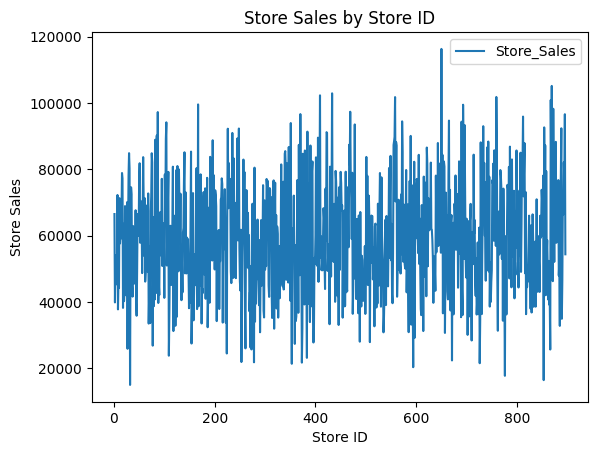

In [19]:
import matplotlib.pyplot as plt
df.plot(x="Store ID ", y="Store_Sales", kind="line")

plt.xlabel("Store ID") 
plt.ylabel("Store Sales")
plt.title("Store Sales by Store ID")

plt.show()

2. Столбчатая диаграмма (bar). Средние продажи

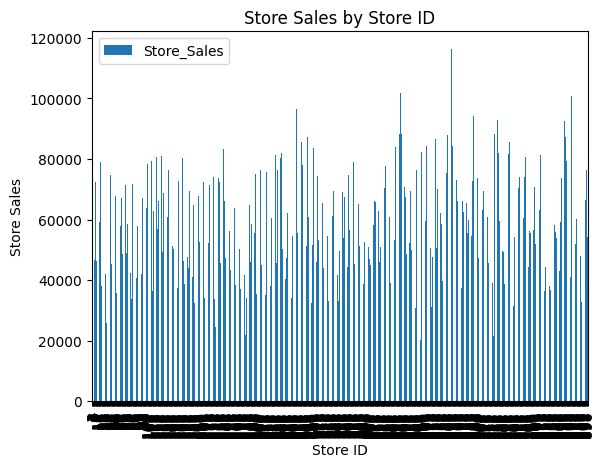

In [20]:
df.plot(x="Store ID ", y="Store_Sales", kind="bar")

plt.xlabel("Store ID") 
plt.ylabel("Store Sales")
plt.title("Store Sales by Store ID")

plt.show()

3. Гистограмма (hist). Распределение количества товаров

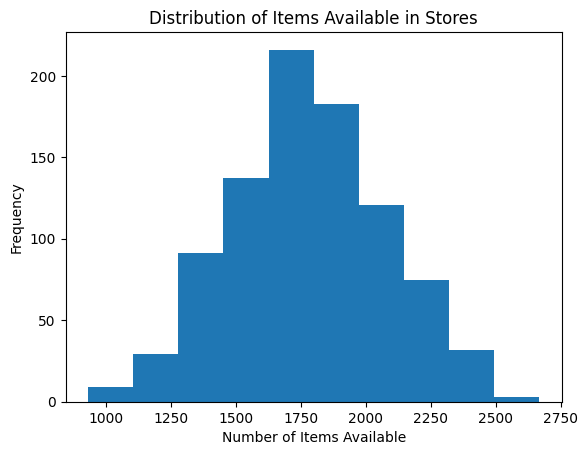

In [21]:
df["Items_Available"].plot(kind="hist")

plt.xlabel("Number of Items Available") 
plt.ylabel("Frequency") 
plt.title("Distribution of Items Available in Stores") 

plt.show()

4. Ящик с усами (box). Продажи

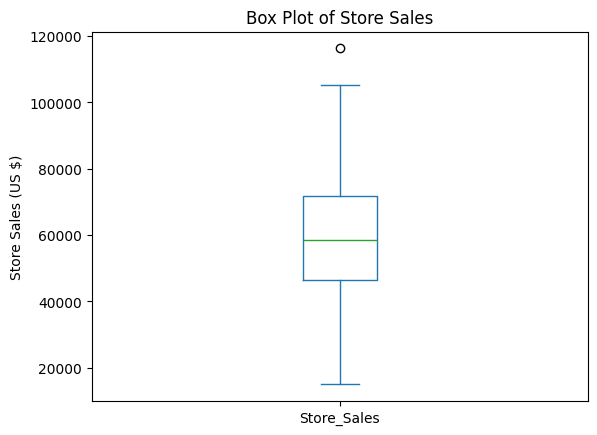

In [22]:
df["Store_Sales"].plot(kind="box")

plt.ylabel("Store Sales (US $)") 
plt.title("Box Plot of Store Sales") 

plt.show()

5. Диаграмма с областями (area). 

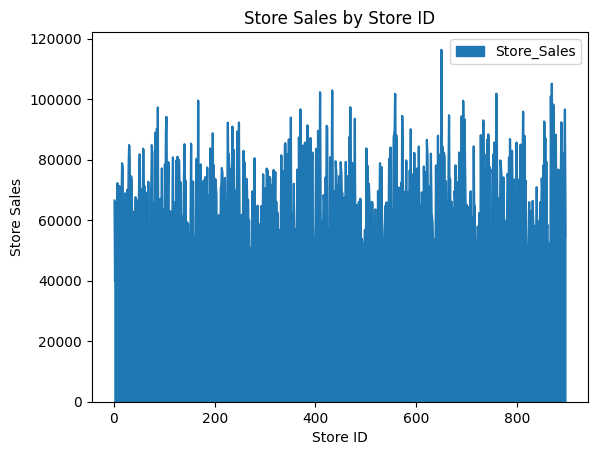

In [23]:
df.plot(x="Store ID ", y="Store_Sales", kind="area")

plt.xlabel("Store ID") 
plt.ylabel("Store Sales")
plt.title("Store Sales by Store ID")

plt.show()

6. Диаграмма рассеяния (scatter). Зависимость продаж от количества посетителей

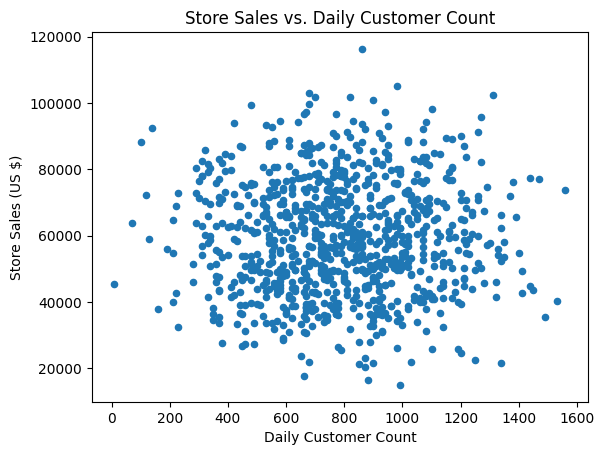

In [24]:
df.plot(kind="scatter", x="Daily_Customer_Count", y="Store_Sales")

plt.xlabel("Daily Customer Count") 
plt.ylabel("Store Sales (US $)")
plt.title("Store Sales vs. Daily Customer Count") 

plt.show()

7. Круговая диаграмма (pie). Количество товаров

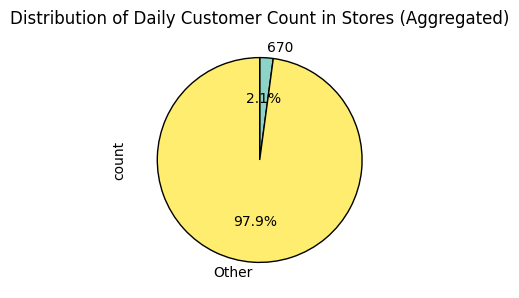

In [25]:
# Определение порога для объединения редких значений
threshold = 0.02  # Порог 2%

# Подсчёт количества уникальных значений и расчёт частот
value_counts = df["Daily_Customer_Count"].value_counts()
total_count = value_counts.sum()

# Условие для агрегации значений ниже порога
other_values = value_counts[value_counts / total_count < threshold].sum()
main_values = value_counts[value_counts / total_count >= threshold]

# Добавление категории "Other"
main_values["Other"] = other_values

# Построение диаграммы
main_values.plot(kind="pie", 
                 autopct='%1.1f%%',  # Проценты
                 startangle=90,      # Начальный угол
                 counterclock=False, # По часовой стрелке
                 cmap="Set3",        # Цветовая схема
                 wedgeprops={'edgecolor': 'black'}) # Границы сегментов

plt.title("Distribution of Daily Customer Count in Stores (Aggregated)")
plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.1)
plt.show()
